In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('./Date_Fruit_Datasets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [3]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

In [4]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [5]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,...,2.5138,3.0369,3.0865,-3.198348e+10,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


In [6]:
df.shape

(898, 35)

In [7]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [8]:
df['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

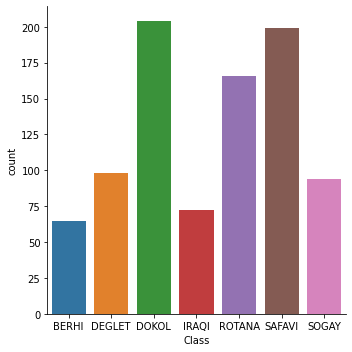

In [9]:
sns.catplot(x='Class', data=df, kind='count')

In [10]:
df.replace({"Class":{'BERHI':0, 'DEGLET':1, 'DOKOL':2, 'IRAQI':3, 'ROTANA':4, 'SAFAVI':5, 'SOGAY':6}}, inplace=True)

In [11]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,0


In [12]:
df['Class'].value_counts()

2    204
5    199
4    166
1     98
6     94
3     72
0     65
Name: Class, dtype: int64

In [13]:
X = df.drop(columns=['Class'], axis=1)
Y = df['Class']

print(X)

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0      0.9947       424428  0.7831

In [14]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
893    6
894    6
895    6
896    6
897    6
Name: Class, Length: 898, dtype: int64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [23]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, Y_test)

print(f'Accuracy Score on Test Data: {test_accuracy*100:.2f}%')

Accuracy Score on Test Data: 93.89%


In [27]:
input_data = (327911,2156.5811,786.681,535.171,0.7329,646.1495,0.9884,331747,0.8086,1.47,0.886,0.8214,0.0024,0.0016,0.6746,0.9917,73.4656,61.3158,87.0085,29.3287,22.0776,29.637,0.4087,1.1167,0.2499,2.3905,6.2663,2.4809,-18492993536,-11971893248,-25614567424,36.7302,30.6568,43.503)

input_array = np.asarray(input_data)
input_data_reshaped = input_array.reshape(1,-1)
predict = model.predict(input_data_reshaped)
print(predict)

if predict[0]==0:
    print('Its Berhi!')
elif predict[0]==1:
    print('Its Deglet!')
elif predict[0]==2:
    print('Its Dokol!')
elif predict[0]==3:
    print('Its Iraqi!')
elif predict[0]==4:
    print('Its Rotana!')
elif predict[0]==5:
    print('Its Safavi!')
elif predict[0]==6:
    print('Its Sogay!')

[6]
Its Sogay!
